In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
df_pierce   = pd.read_csv("../data/danger_tax_robinson.csv")
df_king     = pd.read_csv("../data/danger_king_robinson.csv")
df_thurston = pd.read_csv("../data/danger_thurston_robinson.csv")

In [32]:
df_pierce.head()

,TaxParcelNumber,TaxParcelType,TaxParcelUnitType,EditDate,Delivery_Address,City_State,Zipcode,Site_Address,Land_Acres,Land_Value,...,X_Coordinate,Y_Coordinate,Longitude,Latitude,Shape__Area,Shape__Length,CASE_1,CASE_2,CASE_3,is_threatened
0,21247005,Base Parcel,,1998-07-24T00:00:00.000Z,UNKNOWN PARTY ADDRESS,"UNKNOWN CITY, WA",NaN,XXX 34TH STCT NW,0.0000,0,...,1.081288e+06,721057.9755,-122.75325,47.28867,38758.018311,1141.837123,0.0,0.0,0.0,False
1,21247006,Base Parcel,NaN,2014-11-26T12:23:33.000Z,3211 MCEWAN ROAD NW,"LAKEBAY, WA",98349,3211 MCEWAN RD NW,7.6300,364000,...,1.080163e+06,720458.5894,-122.75771,47.28694,345604.122986,3638.028072,0.0,0.0,0.0,False
2,21247007,Base Parcel,,2014-11-26T12:23:33.000Z,3211 MCEWAN ROAD NW,"LAKEBAY, WA",98349,3209 MCEWAN RD NW,2.8700,251400,...,1.081042e+06,720375.4829,-122.75416,47.28678,133528.313354,2089.154656,0.0,0.0,0.0,False
3,21247700,Base Parcel,,1996-01-23T00:00:00.000Z,PO BOX 670,"LAKEBAY, WA",98349-0670,XXX Undetermined Situs,1.3174,33900,...,1.080063e+06,720851.0629,-122.75815,47.28801,60097.457336,1243.548915,0.0,0.0,0.0,False
4,21247701,Base Parcel,,1996-01-23T00:00:00.000Z,PO BOX 670,"LAKEBAY, WA",98349-0670,16407 33RD STCT NW,2.7100,251200,...,1.080827e+06,720849.5547,-122.75508,47.28806,122531.592957,2293.364640,0.0,0.0,0.0,False


In [33]:
df_king.head()

,Unnamed: 0,ADDR_FULL,ZIP5,PLUS4,CTYNAME,POSTALCTYNAME,LAT,LON,APPRLNDVAL,APPR_IMPR,TAX_LNDVAL,TAX_IMPR,is_threatened
0,0,2108 B ST NW,98001,1624.0,AUBURN,AUBURN,47.32735,-122.23105,5115900.0,20709100.0,5115900.0,20709100.0,0
1,1,5 14TH ST NW,98001,4000.0,AUBURN,AUBURN,47.32053,-122.22926,672700.0,827600.0,672700.0,827600.0,0
2,2,9 14TH ST NW,98001,4000.0,AUBURN,AUBURN,47.32054,-122.23093,1324800.0,4961600.0,1324800.0,4961600.0,0
3,3,9 16TH ST NW,98001,1613.0,AUBURN,AUBURN,47.32371,-122.23141,682200.0,6711900.0,682200.0,6711900.0,0
4,4,8 16TH ST NW,98001,1616.0,AUBURN,AUBURN,47.32284,-122.23138,2810800.0,4377000.0,2810800.0,4377000.0,0


In [34]:
df_thurston.head()

,Unnamed: 0,PARCEL_NO,ADDRESS1,CITY,STATE,ZIP,BLDG_VALUE,LAND_VALUE,TOTAL_VALU,LAT,LONG,LOOKUP,SUCCESS,is_threatened
0,0,11728340400,11231 STEDMAN RD SE,OLYMPIA,WA,98513,0.0,14200.0,14200.0,46.92579,-122.81080,1,1,NaN
1,1,11728430200,11046 TEMPO LK DR SE,OLYMPIA,WA,98513,0.0,58600.0,58600.0,0.00000,0.00000,1,0,NaN
2,2,11728430401,11249 STEDMAN RD SE,OLYMPIA,WA,98513,0.0,64200.0,64200.0,46.92603,-122.81099,1,1,NaN
3,3,11730210101,7235 44TH AVE NE,OLYMPIA,WA,98516,0.0,102400.0,102400.0,0.00000,0.00000,1,0,NaN
4,4,57730000400,5420 CALEB CT SE,OLYMPIA,WA,98513,0.0,118900.0,118900.0,0.00000,0.00000,1,0,NaN


In [35]:
df_king["is_threatened"].value_counts()

0       35581
True     2825
Name: is_threatened, dtype: int64

In [36]:
df_thurston["is_threatened"].value_counts()

True    110
Name: is_threatened, dtype: int64

In [37]:
# Remapping is_threatened to make grouping and concatenating easier.
df_king["is_threatened"]     = df_king["is_threatened"].map({"True": True, "0": False})
df_thurston["is_threatened"] = df_thurston["is_threatened"].map({True: True, np.nan: False})

In [38]:
df_thurston["is_threatened"].value_counts()

False    17473
True       110
Name: is_threatened, dtype: int64

In [39]:
df_king["is_threatened"].value_counts()

False    35581
True      2825
Name: is_threatened, dtype: int64

In [40]:
df_pierce["is_threatened"].value_counts()

False    298390
True      29697
Name: is_threatened, dtype: int64

In [41]:
king_danger = df_king[df_king["is_threatened"]]

df_king[df_king["TAX_IMPR"] == king_danger["TAX_IMPR"].max()]

,Unnamed: 0,ADDR_FULL,ZIP5,PLUS4,CTYNAME,POSTALCTYNAME,LAT,LON,APPRLNDVAL,APPR_IMPR,TAX_LNDVAL,TAX_IMPR,is_threatened
12925,12925,3647 C ST SW,98047,3600.0,AUBURN,PACIFIC,47.27451,-122.23425,24505500.0,100143000.0,24505500.0,100143000.0,True


> This entry, with a taxable value of over 100 million, is the most valuable "at risk" parcel and refers to Safeway's distribution center in downtown Auburn.

In [42]:
king_danger[king_danger["TAX_IMPR"] >= 50_000_000]

,Unnamed: 0,ADDR_FULL,ZIP5,PLUS4,CTYNAME,POSTALCTYNAME,LAT,LON,APPRLNDVAL,APPR_IMPR,TAX_LNDVAL,TAX_IMPR,is_threatened
12487,12487,2202 PERIMETER RD SW,98001,NaN,AUBURN,NaN,47.28967,-122.23859,9540000.0,69530900.0,9540000.0,69530900.0,True
12925,12925,3647 C ST SW,98047,3600.0,AUBURN,PACIFIC,47.27451,-122.23425,24505500.0,100143000.0,24505500.0,100143000.0,True


In [43]:
print("King County size:\t", df_king.shape)
print("Pierce County size:\t", df_pierce.shape)
print("Thurston County size:\t", df_thurston.shape)

King County size:	 (38406, 13)
Pierce County size:	 (328087, 24)
Thurston County size:	 (17583, 14)


## Aggregating
---

In [44]:
model_king = df_king.groupby("is_threatened").sum()[[#"APPRLNDVAL", 
                                                     #"APPR_IMPR", 
                                                     "TAX_LNDVAL", 
                                                     "TAX_IMPR"]]
model_king

,TAX_LNDVAL,TAX_IMPR
is_threatened,,
False,5.288315e+09,1.206920e+10
True,3.423397e+08,1.091014e+09


In [45]:
model_pierce = df_pierce.groupby("is_threatened").sum()[["Land_Value", 
                                                         "Improvement_Value", 
                                                         "Taxable_Value"]]

model_pierce

,Land_Value,Improvement_Value,Taxable_Value
is_threatened,,,
False,41552703075,67851212115,96816459986
True,7078367309,8496261700,12781595349


In [46]:
model_thurston = df_thurston.groupby("is_threatened").sum()[["TOTAL_VALU",
                                                             "BLDG_VALUE",
                                                             "LAND_VALUE"]]

model_thurston

,TOTAL_VALU,BLDG_VALUE,LAND_VALUE
is_threatened,,,
False,4.891489e+09,3.569679e+09,1.321810e+09
True,1.443203e+07,1.115550e+07,3.276530e+06


In [68]:
king_est = model_king.loc[True].sum() * 1.201054
pierce_est = model_pierce[["Land_Value", "Improvement_Value"]].loc[True].sum() * 1.201054
thurston_est = model_thurston[["BLDG_VALUE", "LAND_VALUE"]].loc[True].sum() * 1.201054


print("King County Estimate:    \t", king_est)
print("Pierce County Estimate:  \t", pierce_est)
print("Thurston County Estimate:\t", thurston_est)


print("\n", "-" * 40, "\n")


print("King County Average Value Per Property: \t", 
      king_est / df_king["is_threatened"].value_counts().loc[True])

print("Pierce County Average Value Per Property:\t", 
      pierce_est / df_pierce["is_threatened"].value_counts().loc[True])

print("Thurston County Average Value Per Property:\t", 
      thurston_est / df_thurston["is_threatened"].value_counts().loc[True])

King County Estimate:    	 1721535754.4909642
Pierce County Estimate:  	 18705970469.775486
Thurston County Estimate:	 17333647.35962

 ---------------------------------------- 

King County Average Value Per Property: 	 609393.1874304297
Pierce County Average Value Per Property:	 629894.2812329691
Thurston County Average Value Per Property:	 157578.61236018184


In [51]:
model = pd.concat([model_pierce, model_king, model_thurston], axis = 1) 

model

,Land_Value,Improvement_Value,Taxable_Value,TAX_LNDVAL,TAX_IMPR,TOTAL_VALU,BLDG_VALUE,LAND_VALUE
is_threatened,,,,,,,,
False,41552703075,67851212115,96816459986,5.288315e+09,1.206920e+10,4.891489e+09,3.569679e+09,1.321810e+09
True,7078367309,8496261700,12781595349,3.423397e+08,1.091014e+09,1.443203e+07,1.115550e+07,3.276530e+06


In [52]:
baseline_value_structures = model[["Improvement_Value", "TAX_IMPR", "BLDG_VALUE"]].loc[True].sum()

baseline_value_structures

9598431685.0

In [53]:
baseline_value_land = model[["Land_Value", "TAX_LNDVAL", "LAND_VALUE"]].loc[True].sum()

baseline_value_land

7423983520.0

In [54]:
baseline_value_total = model[["Taxable_Value", "TAX_LNDVAL", "TAX_IMPR", "TOTAL_VALU"]].loc[True].sum()

baseline_value_total

14229381545.0

In [60]:
9598431685.0 + 7423983520.0

17022415205.0

In [61]:
baseline_value_total 

17090255622.148432

In [63]:
(9598431685.0 + 7423983520.0) * 1.201054

20444839871.626072

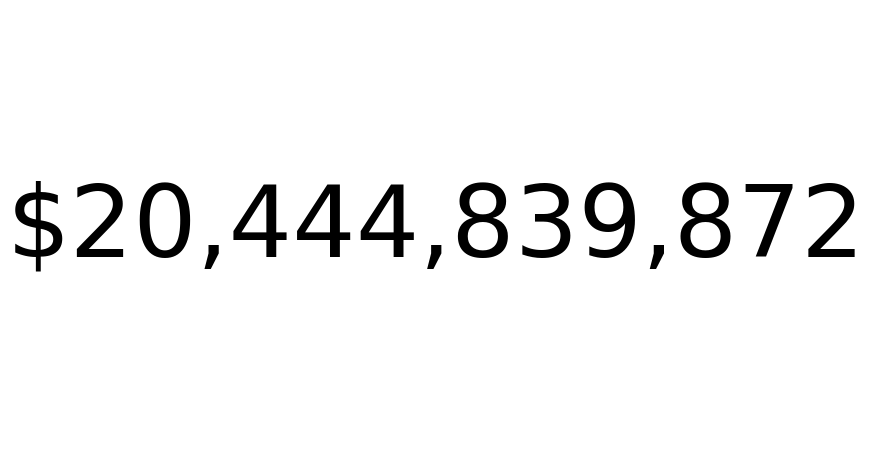

In [17]:
plt.figure(figsize = (8,8))
plt.text(s = "$20,444,839,872",
         x = 0.5,
         y = 0.5,
         ha = "center",
         va = "center",
         size = 100)

plt.axis("off");